# OSIC Pulmonary Fibrosis Progression Kaggle Competition Analysis

In [1]:
# import the kaggle.json file to download the dataset from the API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedhanyyy","key":"0d4320fcf967b75218bfcc8e321d2920"}'}

In [ ]:
#######to mount data from Google drive########
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install --upgrade pip

     |████████████████████████████████| 1.5MB 2.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
pip install kaggle==1.5.6

     |████████████████████████████████| 61kB 3.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=7331f819d3545dac1f17b2aaca2525809500fd9b2962e7c9a6152392707a0d7b
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8


In [3]:
 ! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            442         44  1.0              
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           2492        102  1.0              
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           1466         77  1.0              
balraj98/stanford-background-dataset         

In [7]:
! kaggle competitions download -c 'osic-pulmonary-fibrosis-progression'

100% 13.3G/13.3G [03:41<00:00, 50.3MB/s]
100% 13.3G/13.3G [03:42<00:00, 64.5MB/s]


In [8]:
! mkdir train

In [9]:
! unzip /content/osic-pulmonary-fibrosis-progression.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/ID00370637202296737666151/14.dcm  
  inflating: train/train/ID00370637202296737666151/140.dcm  
  inflating: train/train/ID00370637202296737666151/141.dcm  
  inflating: train/train/ID00370637202296737666151/142.dcm  
  inflating: train/train/ID00370637202296737666151/143.dcm  
  inflating: train/train/ID00370637202296737666151/144.dcm  
  inflating: train/train/ID00370637202296737666151/145.dcm  
  inflating: train/train/ID00370637202296737666151/146.dcm  
  inflating: train/train/ID00370637202296737666151/147.dcm  
  inflating: train/train/ID00370637202296737666151/148.dcm  
  inflating: train/train/ID00370637202296737666151/149.dcm  
  inflating: train/train/ID00370637202296737666151/15.dcm  
  inflating: train/train/ID00370637202296737666151/150.dcm  
  inflating: train/train/ID00370637202296737666151/151.dcm  
  inflating: train/train/ID00370637202296737666151/152.dcm  
  inflating: train/train/ID003706372

In [10]:
# import pydicom to read dcm images 
!pip install pydicom 

     |████████████████████████████████| 35.5MB 126kB/s 


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os 
import pydicom

# Section:1 Handling Data:
Assuming you've downloaded the data , what exactly are we working with here? The data consists of many 2D "slices," which, when combined, produce a 3-dimensional rendering of whatever was scanned.

In [12]:
testing = pd.read_csv('/content/train/test.csv')

In [13]:
testing

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [15]:
testing.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [16]:
data_dir = '/content/train/train/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('/content/train/train.csv',index_col=0)

In [17]:
labels_df.head()

,Weeks,FVC,Percent,Age,Sex,SmokingStatus
Patient,,,,,,
ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [18]:
testing.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [19]:
for patient in patients[:2]:
    label = labels_df._get_value(patient, 'FVC')
    path = data_dir + patient
    
    # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(len(slices),label)
    print(slices[0])

423 [2415 2242 2335 2202 2068 1997 1996]
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.154163687625275743683509176562965262065
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.154163687625275743683509176562965262065
(0008, 0060) Modality       

<BarContainer object of 1549 artists>

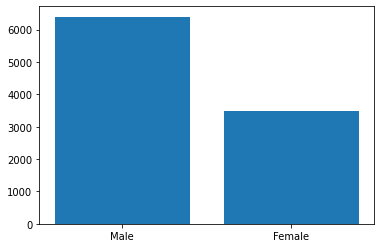

In [39]:
plt.bar(labels_df['Sex'],labels_df['FVC'])

<BarContainer object of 1549 artists>

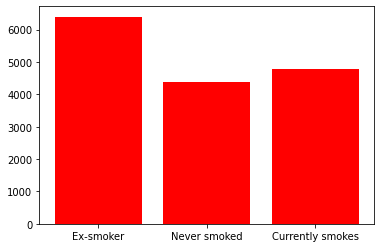

In [46]:
plt.bar(labels_df['SmokingStatus'],labels_df['FVC'],color='red')

(array([ 57., 226., 395., 433., 228., 132.,  53.,  16.,   5.,   4.]),
 array([ 827. , 1384.2, 1941.4, 2498.6, 3055.8, 3613. , 4170.2, 4727.4,
        5284.6, 5841.8, 6399. ]),
 <a list of 10 Patch objects>)

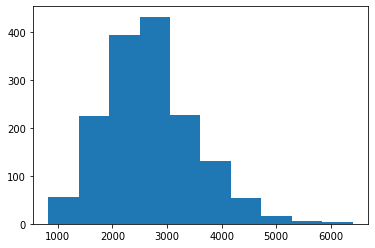

In [61]:
plt.hist(labels_df['FVC'])

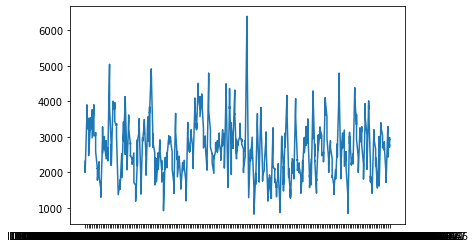

In [65]:
plt.plot(labels_df['FVC'])

In [26]:
for patient in patients[:10]:
    label = labels_df._get_value(patient, 'FVC')
    path = data_dir + patient
    
    # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    try:
      print(slices[0].pixel_array.shape, len(slices))
    except:
      print('')

(512, 512) 423
(768, 768) 394
(512, 512) 49
(512, 512) 54
(512, 512) 38
(512, 512) 296
(512, 512) 245
(512, 512) 258
(512, 512) 66
(512, 512) 25


In [27]:
len(patients)

176

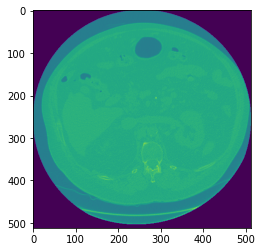

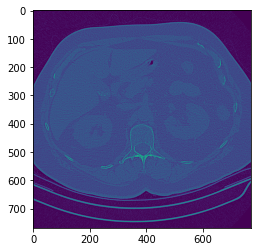

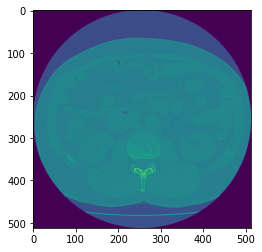

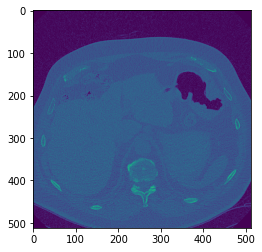

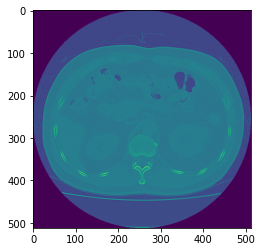

In [28]:
import matplotlib.pyplot as plt

for patient in patients[:5]:
    label = labels_df._get_value(patient, 'FVC')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    #          the first slice
    try:
      plt.imshow(slices[0].pixel_array)
      plt.show()
    except:
      print('None')

# Section 2: Processing and viewing our Data
Okay, so we know what we've got, and what we need to do with it.
We have a few options at this point, we could take the code that we have already and do the processing "online." By this, I mean, while training the network, we can actually just loop over our patients, resize the data, then feed it through our neural network. We actually don't have to have all of the data prepared before we go through the network.

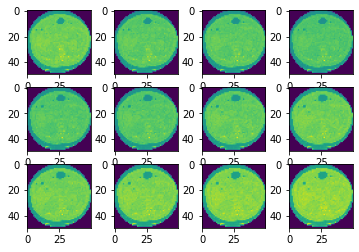

In [29]:
import cv2
import numpy as np

IMG_PX_SIZE = 50

for patient in patients[:1]:
    label = labels_df._get_value(patient, 'FVC')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    fig = plt.figure()
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_img = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_img)
    plt.show()

In [30]:
import math
def chunks(l, n):
    # Credit: Ned Batchelder
    # Link: http://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l) / len(l)

IMG_PX_SIZE = 50
hm_slices = 20

data_dir = '/content/train/train/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('/content/train/train.csv',index_col=0)

for patient in patients[:10]:
    try:
        label = labels_df._get_value(patient, 'FVC')
        path = data_dir + patient
        slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        new_slices = []
        slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
        chunk_sizes = math.ceil(len(slices) / hm_slices)
        for slice_chunk in chunks(slices, chunk_sizes):
            slice_chunk = list(map(mean, zip(*slice_chunk)))
            new_slices.append(slice_chunk)

        print(len(slices), len(new_slices))
    except:
        # some patients don't have labels, so we'll just pass on this for now
        pass

423 20
394 20
49 17
54 18
38 19
296 20
245 19
258 20
66 17
25 13


In [31]:
len(patients)

176

In [32]:
for patient in patients[:10]:
    try:
        label = labels_df._get_value(patient, 'FVC')
        path = data_dir + patient
        slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        new_slices = []

        slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]

        chunk_sizes = math.ceil(len(slices) / hm_slices)


        for slice_chunk in chunks(slices, chunk_sizes):
            slice_chunk = list(map(mean, zip(*slice_chunk)))
            new_slices.append(slice_chunk)

        if len(new_slices) == hm_slices-1:
            new_slices.append(new_slices[-1])

        if len(new_slices) == hm_slices-2:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])

        if len(new_slices) == hm_slices-3:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])

        if len(new_slices) == hm_slices-4:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])

        if len(new_slices) == hm_slices-5:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])            
            new_slices.append(new_slices[-1]) 

        if len(new_slices) == hm_slices-6:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])

        if len(new_slices) == hm_slices-7:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])

        if len(new_slices) == hm_slices-8:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
        if len(new_slices) == hm_slices-9:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1]) 
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])                     
            new_slices.append(new_slices[-1])


        if len(new_slices) == hm_slices+2:
            new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
            del new_slices[hm_slices]
            new_slices[hm_slices-1] = new_val

        if len(new_slices) == hm_slices+1:
            new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
            del new_slices[hm_slices]
            new_slices[hm_slices-1] = new_val

        print(len(slices), len(new_slices))
    except Exception as e:
        # again, some patients are not labeled, but JIC we still want the error if something
        # else is wrong with our code
        print(str(e))

423 20
394 20
49 20
54 20
38 20
296 20
245 20
258 20
66 20
25 20


In [33]:
for patient in patients[:15]:
    label = labels_df._get_value(patient, 'FVC')
    path = data_dir + patient
    
    # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(len(slices),label)
    # print(slices[0])

423 [2415 2242 2335 2202 2068 1997 1996]
394 [3660 3610 3895 3759 3639 3578 3625 3390 3214]
49 [3418 3759 3276 3443 3268 3449 3324 3231 2971]
54 [2992 2637 2643 2705 2679 2388 2722 2656 2812]
38 [2080 2022 1769 2002 1756 2008 1848 1897]
296 [2061 2129 2095 2142 2120 2185 2124 2179 2257]
245 [3247 3241 3226 3156 3160 2965 3105 2952 2686]
258 [1674 1674 1766 1687 1586 1454 1406 1484 1566]
66 [2421 2335 2581 2416 2398 2230 2294 2122]
25 [3107 2879 2828 2908 3002 2718 2738]
62 [3130 2965 3197 2761 3009 3175 3021 2991 2743]
258 [1412 1644 1550 1561 1818 1707 1581 1760]
260 [2805 2848 2618 2838 2830 2769 3051 2734 2677]
521 [2375 2305 2263 2325 2277 2173 1653 1861]
38 [4143 2951 4287 4143 4198 4279 4238 4247 4218]


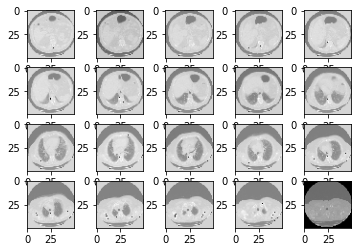

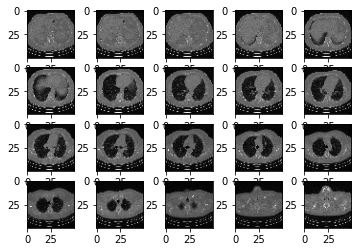

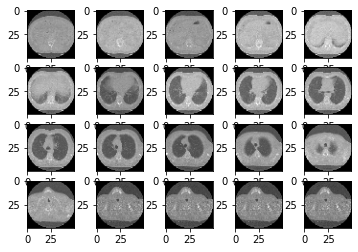

In [34]:
for patient in patients[:3]:
    label = labels_df._get_value(patient, 'FVC')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    new_slices = []

    slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
    
    chunk_sizes = math.ceil(len(slices) / hm_slices)
    for slice_chunk in chunks(slices, chunk_sizes):
      slice_chunk = list(map(mean, zip(*slice_chunk)))
      new_slices.append(slice_chunk)

    if len(new_slices) == hm_slices-1:
      new_slices.append(new_slices[-1])
    if len(new_slices) == hm_slices-2:
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
    if len(new_slices) == hm_slices-3:
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
    if len(new_slices) == hm_slices-4:
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
    if len(new_slices) == hm_slices-5:
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])            
      new_slices.append(new_slices[-1]) 
    if len(new_slices) == hm_slices-6:
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
    if len(new_slices) == hm_slices-7:
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
    if len(new_slices) == hm_slices-8:
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
    if len(new_slices) == hm_slices-9:
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1]) 
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])
      new_slices.append(new_slices[-1])                     
      new_slices.append(new_slices[-1])
    if len(new_slices) == hm_slices+2:
        new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1] = new_val
        
    if len(new_slices) == hm_slices+1:
        new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1] = new_val
    
    fig = plt.figure()
    for num,each_slice in enumerate(new_slices):
        y = fig.add_subplot(4,5,num+1)
        y.imshow(each_slice, cmap='gray')
    plt.show()

# Section 3: Preprocessing our Data

In [35]:
IMG_SIZE_PX=20
SLICE_COUNT=10


def chunks(l, n):
  for i in range(0, len(l), n):
    yield l[i:i + n]


def mean(l):
  return sum(l) / len(l)

def process_data(patient,labels_df,img_px_size=10, hm_slices=10, visualize=False):
  label = labels_df._get_value(patient, 'FVC')
  path = data_dir + patient
  slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
  try:
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
  except:
    print('')
  new_slices = []
  try:
    slices = [cv2.resize(np.array(each_slice.pixel_array),(img_px_size,img_px_size)) for each_slice in slices]
  except:
    return [0,0]
  chunk_sizes = math.ceil(len(slices) / hm_slices)
  for slice_chunk in chunks(slices, chunk_sizes):
    slice_chunk = list(map(mean, zip(*slice_chunk)))
    new_slices.append(slice_chunk)

  if len(new_slices) == hm_slices-1:
    new_slices.append(new_slices[-1])

  if len(new_slices) == hm_slices-2:
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])

  if len(new_slices) == hm_slices-3:
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])

  if len(new_slices) == hm_slices-4:
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])

  if len(new_slices) == hm_slices-5:
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])            
    new_slices.append(new_slices[-1]) 

  if len(new_slices) == hm_slices-6:
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])

  if len(new_slices) == hm_slices-7:
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])

  if len(new_slices) == hm_slices-8:
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
  if len(new_slices) == hm_slices-9:
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1]) 
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])
    new_slices.append(new_slices[-1])                     
    new_slices.append(new_slices[-1])

  if len(new_slices) == hm_slices+2:
    new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
    del new_slices[hm_slices]
    new_slices[hm_slices-1] = new_val
        
  if len(new_slices) == hm_slices+1:
    new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
    del new_slices[hm_slices]
    new_slices[hm_slices-1] = new_val

  if visualize:
    fig = plt.figure()
    for num,each_slice in enumerate(new_slices):
      y = fig.add_subplot(4,5,num+1)
      y.imshow(each_slice, cmap='gray')
      plt.show()

  if label.all == 1: label=np.array([0,1])
  elif label.all == 0: label=np.array([1,0])
        
  return np.array(new_slices),label

#                                               stage 1 for real.
data_dir = '/content/train/train/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('/content/train/train.csv',index_col=0)


much_data = []
for num,patient in enumerate(patients):
    if num % 100 == 0:
        print(num)
    try:
        img_data,label = process_data(patient,labels_df,img_px_size=IMG_SIZE_PX, hm_slices=SLICE_COUNT)
        #print(img_data.shape,label)
        much_data.append([img_data,label])
    except KeyError as e:
        print('This is unlabeled data!')

np.save('much_data-{}-{}-{}.npy'.format(IMG_SIZE_PX,IMG_SIZE_PX,SLICE_COUNT), much_data)

0



100


In [41]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np

IMG_PXL_SIZE = 10
SLICE_COUNT = 10

n_classes = 2
batch_size = 10

x = tf.placeholder('float')
y = tf.placeholder('float')

keep_rate = 0.8

In [42]:
def conv3d(x, W):
  return tf.nn.conv3d(x, W, strides=[1,1,1,1,1], padding='SAME')

def maxpool3d(x):
  return tf.nn.max_pool3d(x, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='SAME')

In [50]:
def convolutional_neural_network(x):
    #                # 5 x 5 x 5 patches, 1 channel, 32 features to compute.
    weights = {'W_conv1':tf.Variable(tf.random_normal([3,3,3,1,32])),
               #       5 x 5 x 5 patches, 32 channels, 64 features to compute.
               'W_conv2':tf.Variable(tf.random_normal([3,3,3,32,64])),
               #                                  64 features
               'W_fc':tf.Variable(tf.random_normal([13824  ,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}

    #                            image X      image Y        image Z
    x = tf.reshape(x, shape=[-1, 10, 10, 10, 1])

    conv1 = tf.nn.relu(conv3d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool3d(conv1)


    conv2 = tf.nn.relu(conv3d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool3d(conv2)

    fc = tf.reshape(conv2,[-1, 13824])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])
    fc = tf.nn.dropout(fc, keep_rate)

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output

In [45]:
much_data = np.load('/content/much_data-20-20-10.npy',allow_pickle=True)
# len(much_data)

much_data[:-2]

array([[array([[[-475.90697674, -475.90697674, -475.90697674, ...,
         -475.90697674, -475.90697674, -475.90697674],
        [-475.90697674, -475.90697674, -475.90697674, ...,
         -475.90697674, -475.90697674, -475.90697674],
        [-475.90697674, -475.90697674, -475.90697674, ...,
         -475.90697674, -475.90697674, -475.90697674],
        ...,
        [-475.90697674, -475.90697674, -475.90697674, ...,
         -475.90697674, -475.90697674, -475.90697674],
        [-475.90697674, -475.90697674, -475.90697674, ...,
         -475.90697674, -475.90697674, -475.90697674],
        [-475.90697674, -475.90697674, -475.90697674, ...,
         -475.90697674, -475.90697674, -475.90697674]],

       [[-475.90697674, -475.90697674, -475.90697674, ...,
         -475.90697674, -475.90697674, -475.90697674],
        [-475.90697674, -475.90697674, -475.90697674, ...,
         -475.90697674, -475.90697674, -475.90697674],
        [-475.90697674, -475.90697674, -475.90697674, ...,
      

In [52]:
much_data = np.load('/content/much_data-20-20-10.npy',allow_pickle=True)
# # If you are working with the basic sample data, use maybe 2 instead of 100 here... you don't have enough data to really do this
train_data = much_data[:-2]
validation_data = much_data[-2:]

def train_neural_network(x):
  prediction = convolutional_neural_network(x)
  cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = prediction) )
  optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
  hm_epochs = 5
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    successful_runs = 0
    total_runs = 0
        
    for epoch in range(hm_epochs):
      epoch_loss = 0
      for data in train_data:
        total_runs += 1
        try:
          X = data[0]
          Y = data[1]
          _, c = sess.run([optimizer, cost], feed_dict={x: X, y: Y})
          epoch_loss += c
          successful_runs += 1
        except Exception as e:
          pass
          # print(str(e))
            
      print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)

      correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
      accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

      print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[0] for i in validation_data]}))      

    print('Done. Finishing accuracy:')
    print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[0] for i in validation_data]}))    
    print('fitment percent:',successful_runs/total_runs)

# Run this locally:
# train_neural_network(x)